In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from IPython.display import display # Makes summary readable

#### Load Datasets
Load both the raw and cleaned datasets.

In [34]:
raw_dir = "../data/raw"
clean_dir = "../data/processed"

raw_dfs = {}
clean_dfs = {}

for filename in os.listdir(raw_dir):
    if filename.endswith(".csv"):
        key = filename.replace(".csv", "") # Strip to match list keys
        raw_dfs[key] = pd.read_csv(os.path.join(raw_dir, filename))

for filename in os.listdir(clean_dir):
    if filename.endswith("_cleaned.csv"):
        key = filename.replace("_cleaned.csv", "") # Strip to match list keys
        clean_dfs[key] = pd.read_csv(os.path.join(clean_dir, filename))
        
print("Raw dataset names:", list(raw_dfs.keys()))
print("Cleaned dataset names:", list(clean_dfs.keys()))

Raw dataset names: ['165+PRA+PAC', '43+PRA+PAC', 'AVS_Dryad', 'DataSheet_2', 'DataSheet_3']
Cleaned dataset names: ['165+PRA+PAC', '43+PRA+PAC', 'AVS_Dryad', 'DataSheet_2', 'DataSheet_3']


#### Dataset Shapes
Compare the number of rows and columns in raw vs. cleaned datasets.

In [35]:
for name in raw_dfs:
    raw_df = raw_dfs[name]
    clean_df = clean_dfs.get(name)
    if clean_df is not None:
        print(f"{name}: Raw shape = {raw_df.shape}, Cleaned shape = {clean_df.shape}")

165+PRA+PAC: Raw shape = (165, 13), Cleaned shape = (165, 13)
43+PRA+PAC: Raw shape = (43, 13), Cleaned shape = (43, 13)
AVS_Dryad: Raw shape = (210, 32), Cleaned shape = (209, 28)
DataSheet_2: Raw shape = (43, 11), Cleaned shape = (43, 11)
DataSheet_3: Raw shape = (165, 11), Cleaned shape = (165, 11)


## Missing Values
Print the count of missing values for each dataset.

In [36]:
for name in raw_dfs:
    raw_df = raw_dfs[name]
    clean_df = clean_dfs.get(name)
    if clean_df is not None:
        print(f"\n{name} - Total Missing Values (Raw): {raw_df.isnull().sum().sum()}")
        print(f"{name} - Total Missing Values (Cleaned): {clean_df.isnull().sum().sum()}")


165+PRA+PAC - Total Missing Values (Raw): 11
165+PRA+PAC - Total Missing Values (Cleaned): 0

43+PRA+PAC - Total Missing Values (Raw): 0
43+PRA+PAC - Total Missing Values (Cleaned): 0

AVS_Dryad - Total Missing Values (Raw): 910
AVS_Dryad - Total Missing Values (Cleaned): 0

DataSheet_2 - Total Missing Values (Raw): 0
DataSheet_2 - Total Missing Values (Cleaned): 0

DataSheet_3 - Total Missing Values (Raw): 11
DataSheet_3 - Total Missing Values (Cleaned): 0


#### Summary Statistics
Show summary stats for each dataset.

In [37]:
for name in raw_dfs:
    raw_df = raw_dfs[name]
    clean_df = clean_dfs.get(name)
    if clean_df is not None:
        print(f"\n{name} - Summary Stats (Raw):")
        display(raw_df.describe(include='all'))
        
        print(f"\n{name} - Summary Stats (Cleaned):")
        display(clean_df.describe(include='all'))


165+PRA+PAC - Summary Stats (Raw):


,Diagnosis(PA),Age,Gender,SBP,DBP,PRA,PAC,ARR,K,ARR-50mg,PAC-SLT,PAC reduction,Anti-agents
count,165,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,155.000000,165.000000,165.000000,164.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,54.096970,1.521212,140.284848,86.266667,0.445455,250.996970,1055.120606,3.996970,1405.586323,180.553333,37.372727,1.439024
std,NaN,11.044933,0.501071,17.989430,12.563077,0.424904,229.215353,1504.823921,4.649789,2457.722997,280.523506,54.972616,0.866522
min,NaN,26.000000,1.000000,98.000000,50.000000,0.100000,31.600000,29.200000,2.100000,4.500000,10.000000,-257.600000,0.000000
25%,NaN,45.000000,1.000000,128.000000,79.000000,0.200000,127.000000,300.000000,3.400000,213.000000,42.700000,27.900000,1.000000
50%,NaN,55.000000,2.000000,138.000000,86.000000,0.300000,172.000000,520.000000,3.700000,393.300000,78.600000,52.800000,1.000000
75%,NaN,63.000000,2.000000,150.000000,94.000000,0.500000,282.000000,1096.600000,4.000000,1363.300000,225.000000,67.200000,2.000000



165+PRA+PAC - Summary Stats (Cleaned):


,Diagnosis(PA),Age,Gender,SBP,DBP,PRA,PAC,ARR,K,ARR-50mg,PAC-SLT,PAC reduction,Anti-agents
count,165,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,54.096970,1.521212,140.284848,86.266667,0.445455,250.996970,1055.120606,3.996970,1405.587152,180.553333,37.372727,1.438788
std,NaN,11.044933,0.501071,17.989430,12.563077,0.424904,229.215353,1504.823921,4.649789,2381.613973,280.523506,54.972616,0.863881
min,NaN,26.000000,1.000000,98.000000,50.000000,0.100000,31.600000,29.200000,2.100000,4.500000,10.000000,-257.600000,0.000000
25%,NaN,45.000000,1.000000,128.000000,79.000000,0.200000,127.000000,300.000000,3.400000,225.000000,42.700000,27.900000,1.000000
50%,NaN,55.000000,2.000000,138.000000,86.000000,0.300000,172.000000,520.000000,3.700000,466.000000,78.600000,52.800000,1.000000
75%,NaN,63.000000,2.000000,150.000000,94.000000,0.500000,282.000000,1096.600000,4.000000,1405.600000,225.000000,67.200000,2.000000



43+PRA+PAC - Summary Stats (Raw):


,Diagnosis(PA),Age,Gender,PRA,PAC,SBP,DBP,ARR,K,ARR-50mg,PAC-SIT,PAC reduction,Anti-agents
count,43,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,49.116279,1.604651,218.118605,0.744419,143.860465,92.302326,1139.397674,3.440465,1000.720698,182.342093,10.876744,1.697674
std,NaN,10.040891,0.494712,120.342510,1.145910,15.654881,12.044629,2096.004899,0.453520,1589.818576,124.046090,24.117785,0.802819
min,NaN,25.000000,1.000000,72.100000,0.038000,99.000000,71.000000,151.500000,2.250000,118.900000,33.200000,-82.100000,0.000000
25%,NaN,42.500000,1.000000,155.600000,0.218500,135.000000,81.500000,243.250000,3.195000,261.700000,112.450000,-3.700000,1.000000
50%,NaN,49.000000,2.000000,180.100000,0.532000,142.000000,94.000000,429.200000,3.570000,429.200000,151.600000,11.800000,2.000000
75%,NaN,55.500000,2.000000,224.500000,0.846000,156.000000,101.000000,816.400000,3.720000,965.200000,203.900000,26.000000,2.000000



43+PRA+PAC - Summary Stats (Cleaned):


,Diagnosis(PA),Age,Gender,PRA,PAC,SBP,DBP,ARR,K,ARR-50mg,PAC-SIT,PAC reduction,Anti-agents
count,43,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,49.116279,1.604651,218.118605,0.744419,143.860465,92.302326,1139.397674,3.440465,1000.720698,182.342093,10.876744,1.697674
std,NaN,10.040891,0.494712,120.342510,1.145910,15.654881,12.044629,2096.004899,0.453520,1589.818576,124.046090,24.117785,0.802819
min,NaN,25.000000,1.000000,72.100000,0.038000,99.000000,71.000000,151.500000,2.250000,118.900000,33.200000,-82.100000,0.000000
25%,NaN,42.500000,1.000000,155.600000,0.218500,135.000000,81.500000,243.250000,3.195000,261.700000,112.450000,-3.700000,1.000000
50%,NaN,49.000000,2.000000,180.100000,0.532000,142.000000,94.000000,429.200000,3.570000,429.200000,151.600000,11.800000,2.000000
75%,NaN,55.500000,2.000000,224.500000,0.846000,156.000000,101.000000,816.400000,3.720000,965.200000,203.900000,26.000000,2.000000



AVS_Dryad - Summary Stats (Raw):


,Patients,Diagnosis,Therapy,Age (y),Gender,SBP (mmHg),DBP (mmHg),PRA (ng/ml/h),PAC (pg/ml),ARR,...,PAC on APA side after ACTH stimulation,PAC on contralateral side after ACTH stimulation,KCNJ5,ATP1A1,ATP2B3,CACNA1D,Antihypertensive agents at diagnosis,Antihypertensive agents after treatment,SBP ater surgery (mmHg),DBP after surgery (mmHg)
count,210,209,209,209.000000,209,209.000000,209.000000,209.000000,209.000000,209.000000,...,209.000000,209.000000,74,49,61,14,208.000000,207.000000,90.000000,90.000000
unique,210,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4,2,3,2,NaN,NaN,NaN,NaN
top,1,APA,Medication,NaN,M,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,WT,WT,WT,WT,NaN,NaN,NaN,NaN
freq,1,107,114,NaN,105,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,29,47,59,13,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,54.373206,NaN,140.899522,86.894737,0.498086,247.923445,1033.993780,...,81260.095694,17176.698565,NaN,NaN,NaN,NaN,1.509615,1.483092,122.455556,76.200000
std,NaN,NaN,NaN,11.013298,NaN,17.950639,12.523763,0.690106,218.536531,1459.920248,...,87214.068306,14127.541708,NaN,NaN,NaN,NaN,0.906181,1.018496,13.346852,9.004618
min,NaN,NaN,NaN,26.000000,NaN,98.000000,50.000000,0.100000,31.600000,9.400000,...,4410.000000,1670.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,88.000000,52.000000
25%,NaN,NaN,NaN,46.000000,NaN,129.000000,80.000000,0.200000,121.000000,287.500000,...,30500.000000,6300.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,112.000000,70.000000
50%,NaN,NaN,NaN,55.000000,NaN,139.000000,86.000000,0.300000,172.000000,513.300000,...,48400.000000,12800.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,120.500000,78.000000
75%,NaN,NaN,NaN,63.000000,NaN,151.000000,94.000000,0.500000,293.000000,1092.000000,...,94900.000000,24500.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,130.000000,81.750000



AVS_Dryad - Summary Stats (Cleaned):


,PatientID,Diagnosis(PA),Therapy,Age,Gender,SBP,DBP,PRA,PAC,ARR,...,CSI-preACTH,CSI-postACTH,PAC-APA-preACTH,PAC-CL-preACTH,PAC-APA-postACTH,PAC-CL-postACTH,Anti-agents,Anti-agents-post,SBP-post,DBP-post
count,209.000000,209,209,209.000000,209,209.000000,209.000000,209.000000,209.000000,209.000000,...,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
unique,NaN,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,APA,Medication,NaN,M,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,107,114,NaN,105,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,105.000000,NaN,NaN,54.373206,NaN,140.899522,86.894737,0.498086,247.923445,1033.993780,...,12.745167,1.832201,14653.693780,2345.090431,81260.095694,17176.698565,1.509569,1.483254,122.480861,76.200000
std,60.477268,NaN,NaN,11.013298,NaN,17.950639,12.523763,0.690106,218.536531,1459.920248,...,23.711992,2.073473,25107.972214,3225.378389,87214.068306,14127.541708,0.904000,1.013589,8.730589,5.890181
min,1.000000,NaN,NaN,26.000000,NaN,98.000000,50.000000,0.100000,31.600000,9.400000,...,0.160000,0.050000,259.000000,79.900000,4410.000000,1670.000000,0.000000,0.000000,88.000000,52.000000
25%,53.000000,NaN,NaN,46.000000,NaN,129.000000,80.000000,0.200000,121.000000,287.500000,...,1.180000,0.380000,3430.000000,420.000000,30500.000000,6300.000000,1.000000,1.000000,122.500000,76.200000
50%,105.000000,NaN,NaN,55.000000,NaN,139.000000,86.000000,0.300000,172.000000,513.300000,...,4.750000,1.530000,7900.000000,1070.000000,48400.000000,12800.000000,1.000000,2.000000,122.500000,76.200000
75%,157.000000,NaN,NaN,63.000000,NaN,151.000000,94.000000,0.500000,293.000000,1092.000000,...,14.550000,2.760000,14900.000000,2900.000000,94900.000000,24500.000000,2.000000,2.000000,122.500000,76.200000



DataSheet_2 - Summary Stats (Raw):


,Diagnosis(PA),Age,Gender,SBP,DBP,ARR,K,ARR-50mg,PAC-SIT,PAC reduction,Anti-agents
count,43,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,49.116279,1.604651,143.860465,92.302326,1139.397674,3.440465,1000.720698,182.342093,10.876744,1.697674
std,NaN,10.040891,0.494712,15.654881,12.044629,2096.004899,0.453520,1589.818576,124.046090,24.117785,0.802819
min,NaN,25.000000,1.000000,99.000000,71.000000,151.500000,2.250000,118.900000,33.200000,-82.100000,0.000000
25%,NaN,42.500000,1.000000,135.000000,81.500000,243.250000,3.195000,261.700000,112.450000,-3.700000,1.000000
50%,NaN,49.000000,2.000000,142.000000,94.000000,429.200000,3.570000,429.200000,151.600000,11.800000,2.000000
75%,NaN,55.500000,2.000000,156.000000,101.000000,816.400000,3.720000,965.200000,203.900000,26.000000,2.000000



DataSheet_2 - Summary Stats (Cleaned):


,Diagnosis(PA),Age,Gender,SBP,DBP,ARR,K,ARR-50mg,PAC-SIT,PAC reduction,Anti-agents
count,43,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,49.116279,1.604651,143.860465,92.302326,1139.397674,3.440465,1000.720698,182.342093,10.876744,1.697674
std,NaN,10.040891,0.494712,15.654881,12.044629,2096.004899,0.453520,1589.818576,124.046090,24.117785,0.802819
min,NaN,25.000000,1.000000,99.000000,71.000000,151.500000,2.250000,118.900000,33.200000,-82.100000,0.000000
25%,NaN,42.500000,1.000000,135.000000,81.500000,243.250000,3.195000,261.700000,112.450000,-3.700000,1.000000
50%,NaN,49.000000,2.000000,142.000000,94.000000,429.200000,3.570000,429.200000,151.600000,11.800000,2.000000
75%,NaN,55.500000,2.000000,156.000000,101.000000,816.400000,3.720000,965.200000,203.900000,26.000000,2.000000



DataSheet_3 - Summary Stats (Raw):


,Diagnosis(PA),Age,Gender,SBP,DBP,ARR,K,ARR-50mg,PAC-SIT,PAC reduction,Anti-agents
count,165,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,155.000000,165.000000,165.000000,164.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,54.096970,1.521212,140.284848,86.266667,1055.120606,3.996970,1405.586323,180.553333,37.372727,1.439024
std,NaN,11.044933,0.501071,17.989430,12.563077,1504.823921,4.649789,2457.722997,280.523506,54.972616,0.866522
min,NaN,26.000000,1.000000,98.000000,50.000000,29.200000,2.100000,4.500000,10.000000,-257.600000,0.000000
25%,NaN,45.000000,1.000000,128.000000,79.000000,300.000000,3.400000,213.000000,42.700000,27.900000,1.000000
50%,NaN,55.000000,2.000000,138.000000,86.000000,520.000000,3.700000,393.300000,78.600000,52.800000,1.000000
75%,NaN,63.000000,2.000000,150.000000,94.000000,1096.600000,4.000000,1363.300000,225.000000,67.200000,2.000000



DataSheet_3 - Summary Stats (Cleaned):


,Diagnosis(PA),Age,Gender,SBP,DBP,ARR,K,ARR-50mg,PAC-SIT,PAC reduction,Anti-agents
count,165,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,54.096970,1.521212,140.284848,86.266667,1055.120606,3.996970,1405.587152,180.553333,37.372727,1.438788
std,NaN,11.044933,0.501071,17.989430,12.563077,1504.823921,4.649789,2381.613973,280.523506,54.972616,0.863881
min,NaN,26.000000,1.000000,98.000000,50.000000,29.200000,2.100000,4.500000,10.000000,-257.600000,0.000000
25%,NaN,45.000000,1.000000,128.000000,79.000000,300.000000,3.400000,225.000000,42.700000,27.900000,1.000000
50%,NaN,55.000000,2.000000,138.000000,86.000000,520.000000,3.700000,466.000000,78.600000,52.800000,1.000000
75%,NaN,63.000000,2.000000,150.000000,94.000000,1096.600000,4.000000,1405.600000,225.000000,67.200000,2.000000


#### Correlation Heatmaps
Visualize correlation matrices for cleaned datasets. The AVS_Dryad dataset has a larger figure size due to more variables.

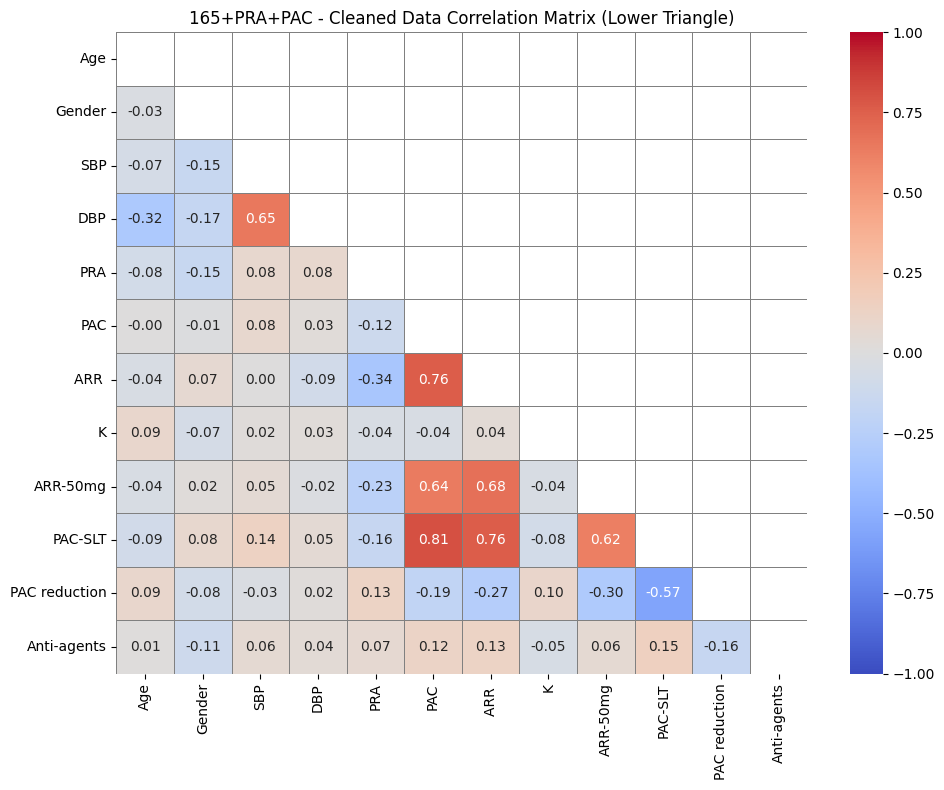

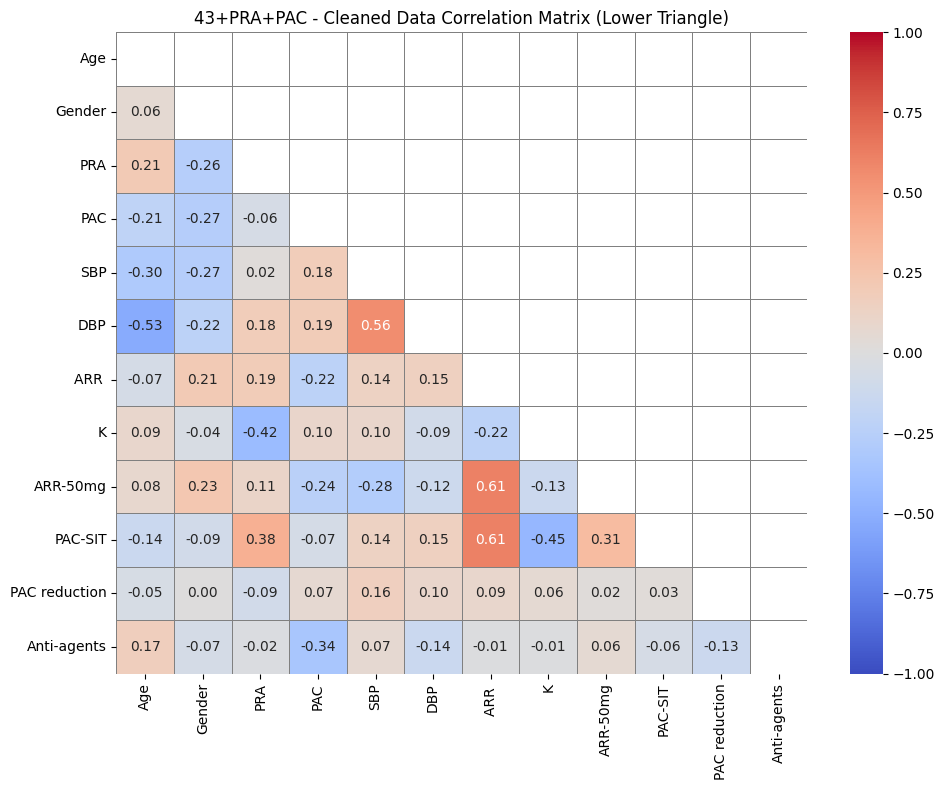

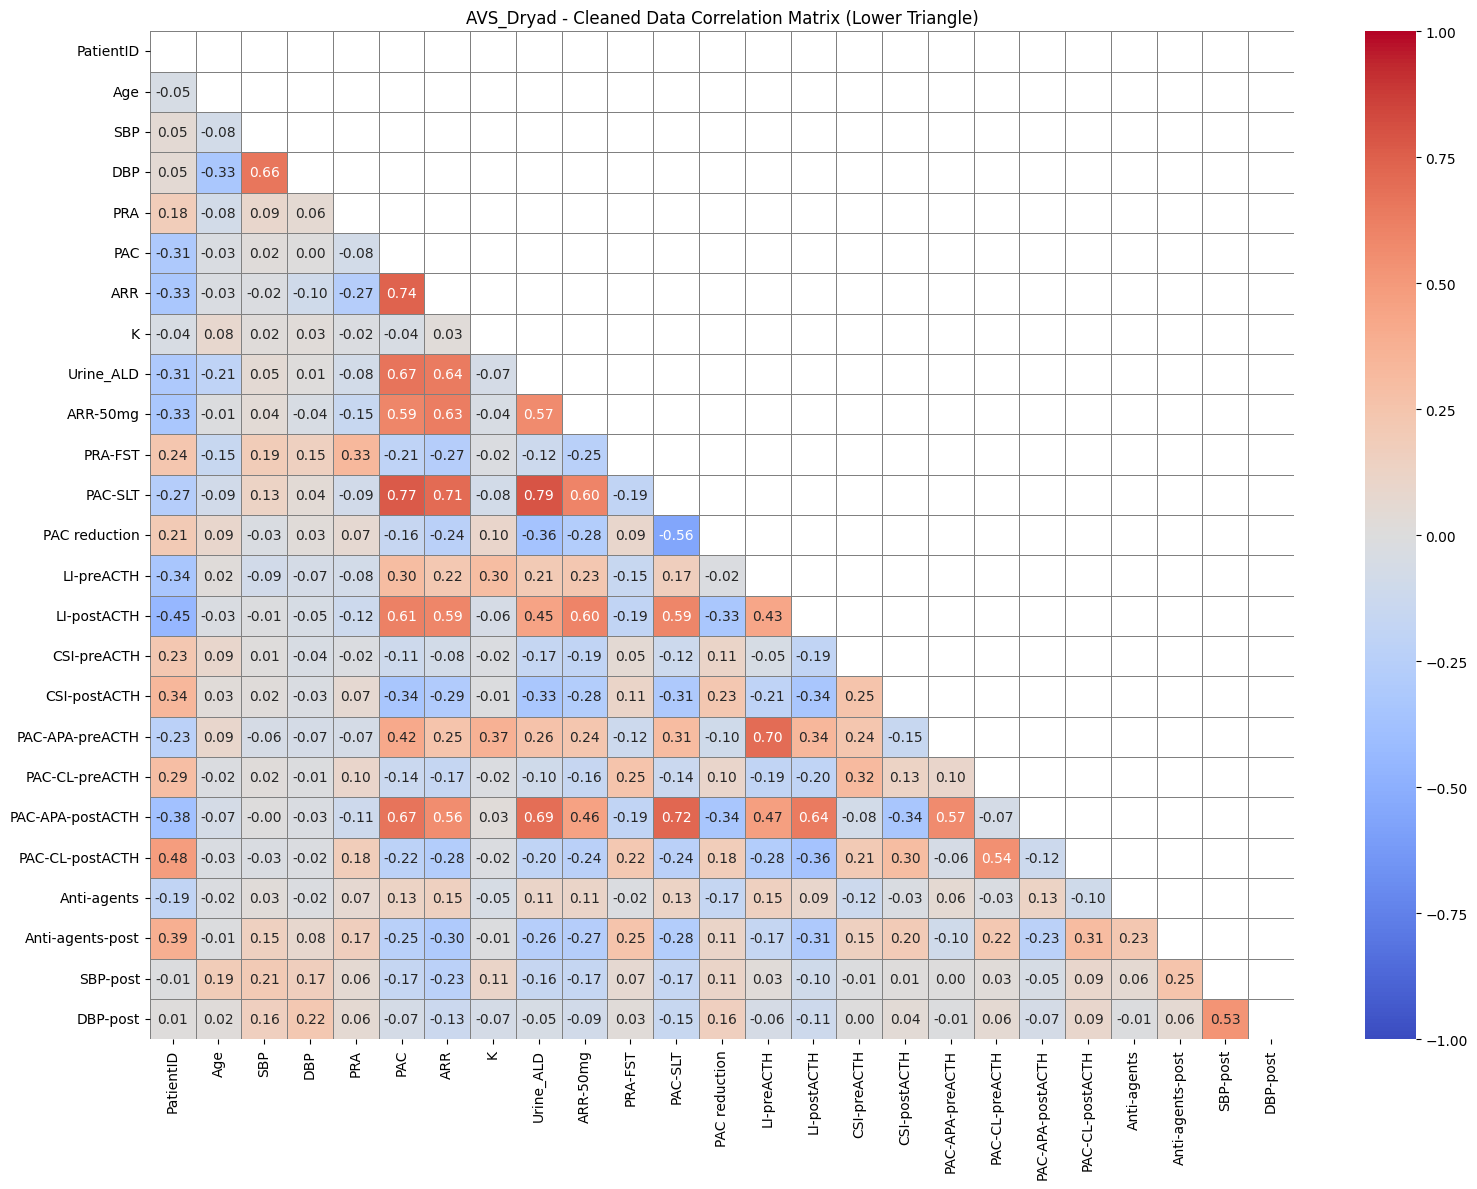

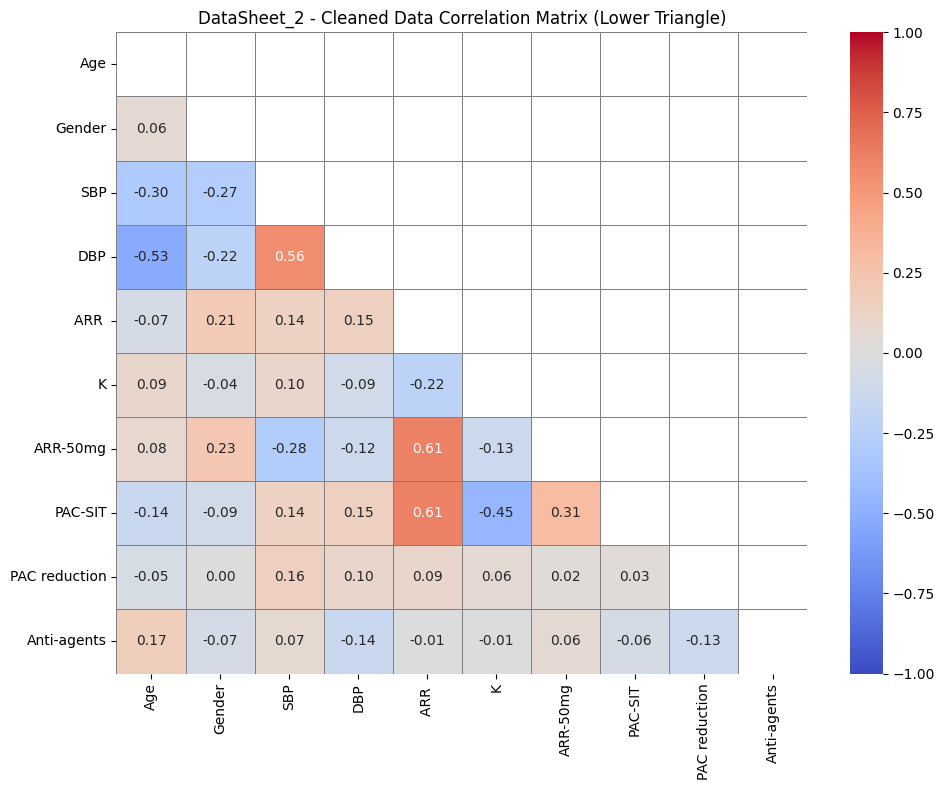

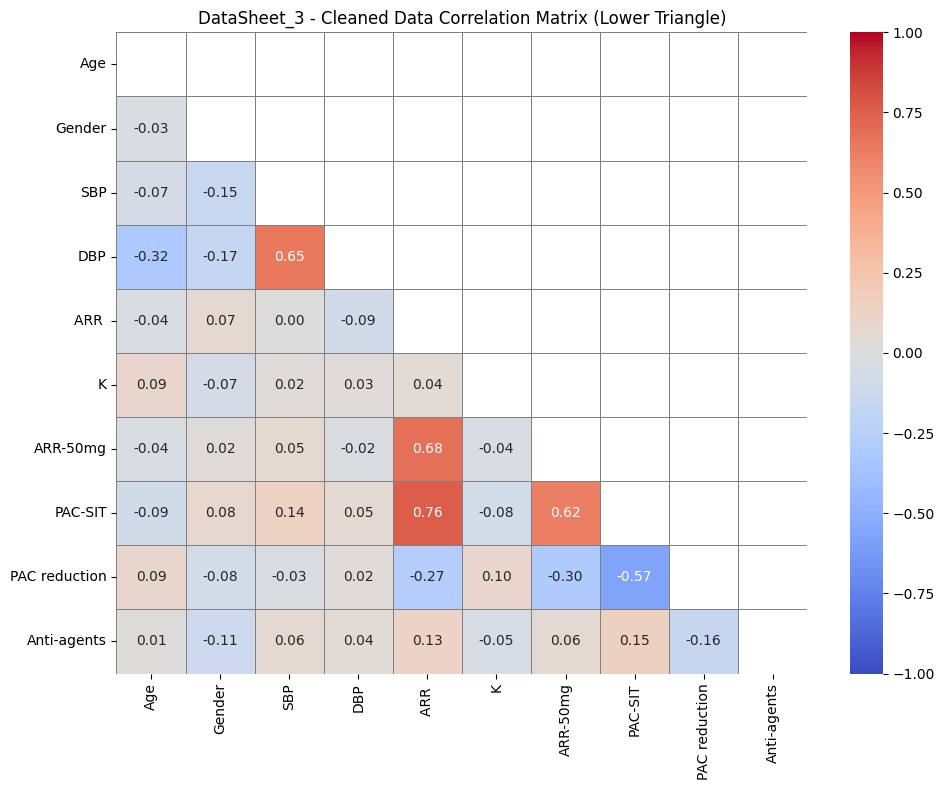

In [40]:
output_heatmap_dir = "../outputs/figures/heatmaps"

for name, df in clean_dfs.items():
    numeric_df = df.select_dtypes(include='number')
    if not numeric_df.empty:
        corr = numeric_df.corr().round(2)
        mask = np.triu(np.ones_like(corr, dtype=bool))

        plt.figure(figsize=(16, 12) if name == "AVS_Dryad" else (10, 8))
        sns.heatmap(
            corr,
            mask=mask,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            vmin=-1,
            vmax=1,
            linewidths=0.5,
            linecolor='gray'
        )
        plt.title(f"{name} - Cleaned Data Correlation Matrix (Lower Triangle)")
        plt.tight_layout()

        plot_path = os.path.join(output_heatmap_dir, f"{name}_correlation_matrix.png")
        plt.savefig(plot_path)
        plt.show()